# Preprocessing


Columns: 
TEAM_ABBREVIATION, FGM_RANK, FGA_RANK, FG_PCT_RANK, FG3M_RANK, FG3A_RANK, FG3_PCT_RANK, FTM_RANK, FTA_RANK, FT_PCT_RANK, OREB_RANK, DREB_RANK, REB_RANK, AST_RANK, TOV_RANK, STL_RANK, BLK_RANK, BLKA_RANK, PF_RANK, PFD_RANK, PTS_RANK, PLUS_MINUS_RANK

In [361]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [362]:
merged_df = pd.read_csv('2022-23_Complete_Data')

main_df = merged_df[['TEAM_ABBREVIATION', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 
                     'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 
                     'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 
                     'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 
                     'PTS_RANK', 'PLUS_MINUS_RANK', 'W_base' ]]

#print(main_df.head(30))


test_df = pd.read_csv('2023-24_Complete_Data')
test_df = test_df['W_base']
print(test_df)

0     36
1     32
2     64
3     21
4     39
5     48
6     50
7     57
8     14
9     46
10    41
11    47
12    47
13    27
14    46
15    49
16    56
17    49
18    50
19    57
20    47
21    47
22    49
23    21
24    46
25    22
26    25
27    31
28    15
Name: W_base, dtype: int64


# Encoding


In [363]:
label_enc = LabelEncoder()

# Fit and transform TEAM_ABBREVIATION into a single numeric column
main_df['TEAM_ABBREVIATION'] = label_enc.fit_transform(main_df['TEAM_ABBREVIATION'])

#print(main_df.head())

C:\Users\antho\AppData\Local\Temp\ipykernel_34288\3691442839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['TEAM_ABBREVIATION'] = label_enc.fit_transform(main_df['TEAM_ABBREVIATION'])


In [364]:
# X: features, y: target variable
x = main_df.drop(columns=['W_base', 'TEAM_ABBREVIATION'], axis=1)  # Drop the target column
#print(x.columns)
y = test_df_cleaned


print(x.shape)  # Should be (n_samples, n_features)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)


(29, 21)
(29,)


LinearRegression()

In [365]:
y_pred = model.predict(X_test)
#print(y_pred)

In [366]:
#Pred all
y_pred_all = model.predict(x)
print(y_pred_all)


[ 59.41556776  37.6616073   39.91596441  48.03840414  52.67232458
  50.5383969   30.68308837  30.95422363  59.67925755  63.5772298
  39.74219755  57.70177466   3.32577394  53.61591149  37.34249739
  41.99070291  35.85087829  44.69288635  15.86037388  45.29602998
  25.42433814  17.67350148 163.50638699  47.2645582   30.56968241
  54.33289873  50.23980016  46.93813036  48.37326959]


In [367]:
#Comparison table
comparison_df = pd.DataFrame({
    'Actual_Wins':y,
    'Pred_wins': y_pred_all
})
comparison_df['Error'] = comparison_df['Actual_Wins'] - comparison_df['Pred_wins']


print(comparison_df)

    Actual_Wins   Pred_wins       Error
0            60   59.415568    0.584432
1            38   37.661607    0.338393
2            40   39.915964    0.084036
4            50   48.038404    1.961596
5            53   52.672325    0.327675
6            50   50.538397   -0.538397
7            30   30.683088   -0.683088
8            32   30.954224    1.045776
9            67   59.679258    7.320742
10           56   63.577230   -7.577230
11           38   39.742198   -1.742198
12           56   57.701775   -1.701775
13           21    3.325774   17.674226
14           55   53.615911    1.384089
15           37   37.342497   -0.342497
16           41   41.990703   -0.990703
17           16   35.850878  -19.850878
18           45   44.692886    0.307114
19           17   15.860374    1.139626
20           45   45.296030   -0.296030
21           25   25.424338   -0.424338
22           18   17.673501    0.326499
23           39  163.506387 -124.506387
24           51   47.264558    3.735442


In [368]:
# Calculate the percentage accuracy for each team
comparison_df['Percent_Accuracy'] = (1 - (abs(comparison_df['Error']) / comparison_df['Actual_Wins'])) * 100

average_accuracy = comparison_df['Percent_Accuracy'].mean()

print(comparison_df)
print(f"Average Percentage Accuracy: {average_accuracy:.2f}%")


    Actual_Wins   Pred_wins       Error  Percent_Accuracy
0            60   59.415568    0.584432         99.025946
1            38   37.661607    0.338393         99.109493
2            40   39.915964    0.084036         99.789911
4            50   48.038404    1.961596         96.076808
5            53   52.672325    0.327675         99.381744
6            50   50.538397   -0.538397         98.923206
7            30   30.683088   -0.683088         97.723039
8            32   30.954224    1.045776         96.731949
9            67   59.679258    7.320742         89.073519
10           56   63.577230   -7.577230         86.469232
11           38   39.742198   -1.742198         95.415270
12           56   57.701775   -1.701775         96.961117
13           21    3.325774   17.674226         15.837019
14           55   53.615911    1.384089         97.483475
15           37   37.342497   -0.342497         99.074331
16           41   41.990703   -0.990703         97.583651
17           1

Feature Correlation Check

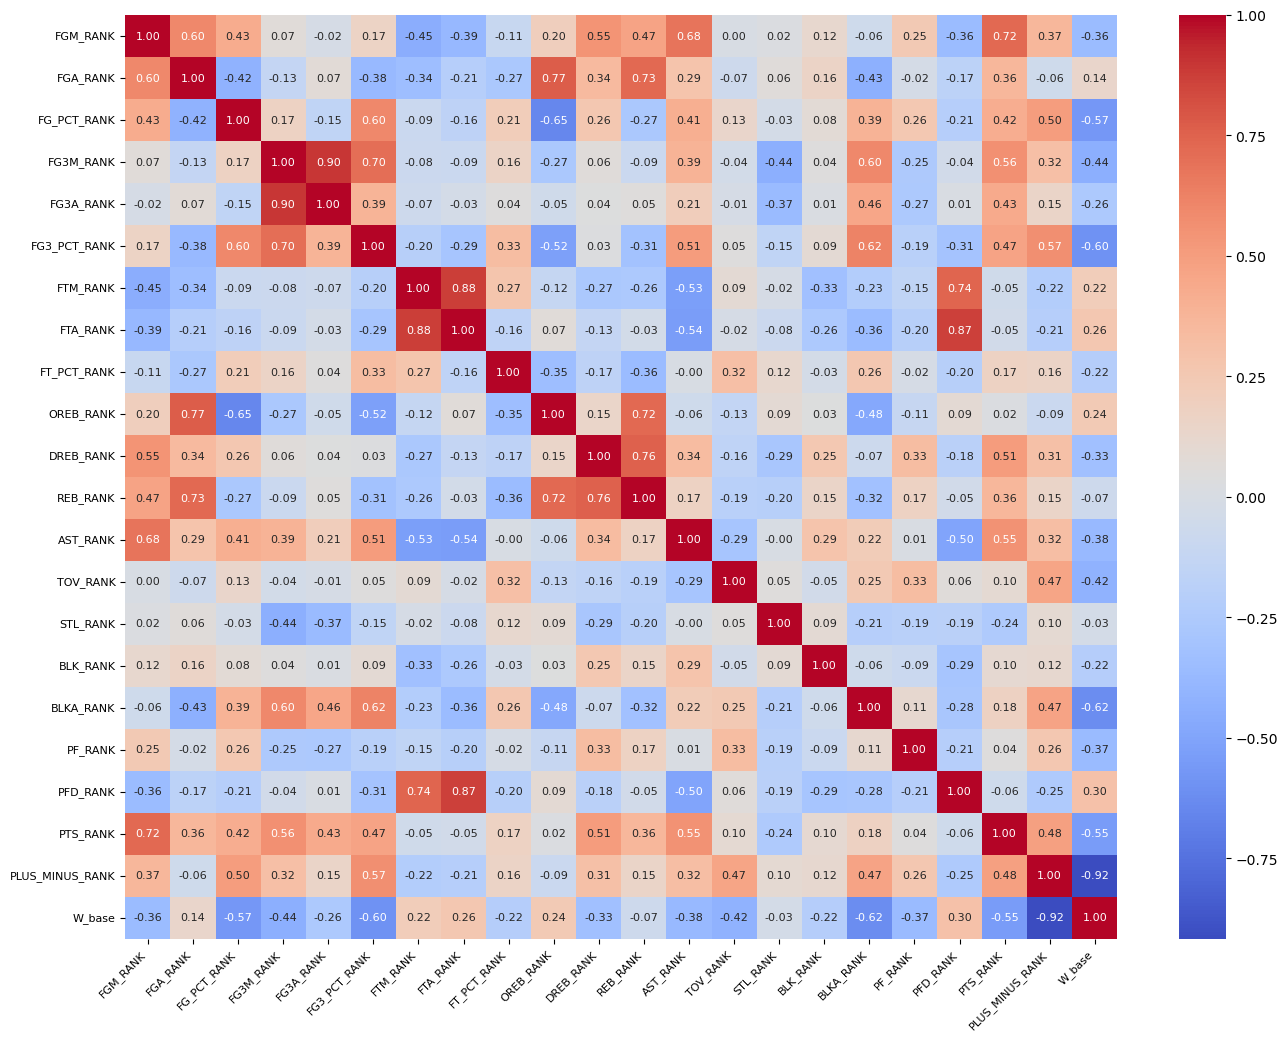

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = main_df.drop(columns=["TEAM_ABBREVIATION"], axis=1)
corr_matrix = corr_df.corr()

plt.figure(figsize=(16, 12))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.show()